In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("chats.csv", header = None)
df.head()
df[2].fillna('N', inplace = True) 
df.sort_values(by = [0])
df.reset_index(inplace =True)
df.drop(columns = ['index', 0, 5, 7], inplace = True)
df.columns = ['sentence', 'label', 'chat_session_id', 'created_by_user_id', 'modified_by_user_id', 'status_id']
df.head()

,sentence,label,chat_session_id,created_by_user_id,modified_by_user_id,status_id
0,NO,N,2,10167,10167,1
1,HELLO SIR,N,2,10167,10167,1
2,NO,N,2,10167,10167,1
3,NO,N,2,10167,10167,1
4,iam connecting your through teamviewr again,O,2,10014,10014,1


In [4]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_train, y_test = train_test_split(df['sentence'], df['label'], random_state=100)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vector = CountVectorizer(stop_words = 'english')
X_train_cv = vector.fit_transform(X_tr)
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train_cv)
X_train.shape

(2482, 1626)

In [6]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train, y_train)
X_test_cv = vector.transform(X_te)
X_test = tfidf_transformer.transform(X_test_cv)
clf.score(X_test, y_test)

0.8683574879227053

In [11]:
array = ["I can't hear you", "Audio Problem", "We are facing communication Issue", "I am unable to connect", "Why is Mayank so Tipsy"]
tst = vector.transform(array)
values = tfidf_transformer.transform(tst)
y_pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[430,  47],
       [ 62, 289]])

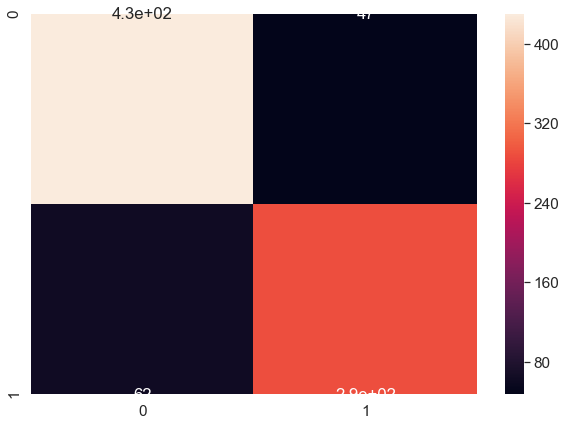

In [37]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = cm

df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [38]:
from sklearn.metrics import classification_report
target_names = ['Operational','Non-Oporational']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Operational       0.87      0.90      0.89       477
Non-Oporational       0.86      0.82      0.84       351

       accuracy                           0.87       828
      macro avg       0.87      0.86      0.86       828
   weighted avg       0.87      0.87      0.87       828



## Classification of YouTube live Chats

In [6]:
with open("ytchats.txt") as file:
    lines = file.read()
lines = lines.split('\n')
lines

['sir will you plz explain..what should be the monopoly criteria that one can have in order to set up any type of business?',
 'what is current market cenerio?',
 'So pure monopoly will bring high profit right?',
 'if repo rates are completely influenced by central bank then is it not very unfair situation for normal banks(in case a reverse repo takes place)????',
 'how the current market structure influence Automobile Industry ?',
 'what is oligopoly?',
 'how degree of elasticity affect the market structure',
 'Sir, Internet warm first major worldwide computer. or software malicious.',
 'define financial system.',
 'why the corporate bond do not pay coupons?',
 'sir Comparing opportunity costs of production is called what?',
 'How macroeconomics deals with fiscal and Monterey policy?',
 'how can I improve my financial literacy?',
 'how the current market structure influence Automobile Industry ?',
 'Sir, There is request ,Regarding financial literacy, what are the pre-requsites to be 

In [7]:
predict_cv = vector.transform(lines)
predict_idf = tfidf_transformer.transform(predict_cv)
clf.predict(predict_idf)

array(['N', 'N', 'O', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'O', 'O',
       'N', 'N', 'O', 'N', 'N', 'N', 'O', 'O', 'N', 'N', 'N', 'N', 'O',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'O', 'N', 'N', 'O', 'O', 'N',
       'O', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N'],
      dtype='<U2')

In [9]:
from rake_nltk import Rake
r = Rake()
prominent_list = []
for i in lines:
  r.extract_keywords_from_sentences(i.split(" "))
#   r.get_ranked_phrases_with_scores()
  prominent_list.append(r.get_ranked_phrases())
prominent_list

[['explain ..',
  'type',
  'sir',
  'set',
  'plz',
  'order',
  'one',
  'monopoly',
  'criteria',
  'business'],
 ['market', 'current', 'cenerio'],
 ['right', 'pure', 'profit', 'monopoly', 'high', 'bring'],
 ['place )????',
  'unfair',
  'takes',
  'situation',
  'reverse',
  'repo',
  'rates',
  'normal',
  'influenced',
  'completely',
  'central',
  'case',
  'banks',
  'bank'],
 ['structure', 'market', 'influence', 'industry', 'current', 'automobile'],
 ['oligopoly'],
 ['structure', 'market', 'elasticity', 'degree', 'affect'],
 ['worldwide',
  'warm',
  'software',
  'sir',
  'malicious',
  'major',
  'internet',
  'first',
  'computer'],
 ['system', 'financial', 'define'],
 ['pay', 'coupons', 'corporate', 'bond'],
 ['sir', 'production', 'opportunity', 'costs', 'comparing', 'called'],
 ['policy', 'monterey', 'macroeconomics', 'fiscal', 'deals'],
 ['literacy', 'improve', 'financial'],
 ['structure', 'market', 'influence', 'industry', 'current', 'automobile'],
 ['understand',
  's